In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("filtered_thyroid_data.csv")

In [4]:
df

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In the above dataset there are
383 rows
13 columns
no null value
Age is Integer type
other 12 columns is object type

In [6]:
df.isna().sum()  # check the null value

Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64

In [7]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Average of age is 40.86
minimum age of thyroid person is 15
maximum age of thyroid person is 82

In [19]:
df.columns   #shows the column names in dataset

Index(['Age', 'Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [20]:
df['Risk'].unique()    #shows unique Risk levels

array(['Low', 'Intermediate', 'High'], dtype=object)

In [21]:
df[df["Risk"] == "High"].shape[0]  #32 persons have high risk

32

In [8]:
df[df["Risk"] == "Low"].shape[0]  #249 persons have Low risk

249

In [9]:
df[df["Risk"] == "Intermediate"].shape[0]  #102 persons have Intermediate risk

102

In [12]:
#df[df["Age"] >= 30]
df[df['Age'] >= 50].shape[0] #108 persons is above 50 years old who have thyroid

108

In [14]:
df[df["Age"] == 40] # below data of the persons who have age 40
#df[df["Age"] == 40].value_counts()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
9,40,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
16,40,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
70,40,F,No,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
83,40,F,No,No,Papillary,Uni-Focal,Intermediate,T1b,N0,M0,I,Excellent,No
165,40,F,No,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
169,40,M,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
206,40,F,No,Left,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
219,40,F,No,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Excellent,No
229,40,M,No,Bilateral,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes


In [30]:
x = df[df["Age"] >= 50].groupby("Risk").size()
print(x)
#there are 20(High),34(Intermediate),54(low) Risk patients above age 50

Risk
High            20
Intermediate    34
Low             54
dtype: int64


In [31]:
df["Age"].mean()

np.float64(40.866840731070496)

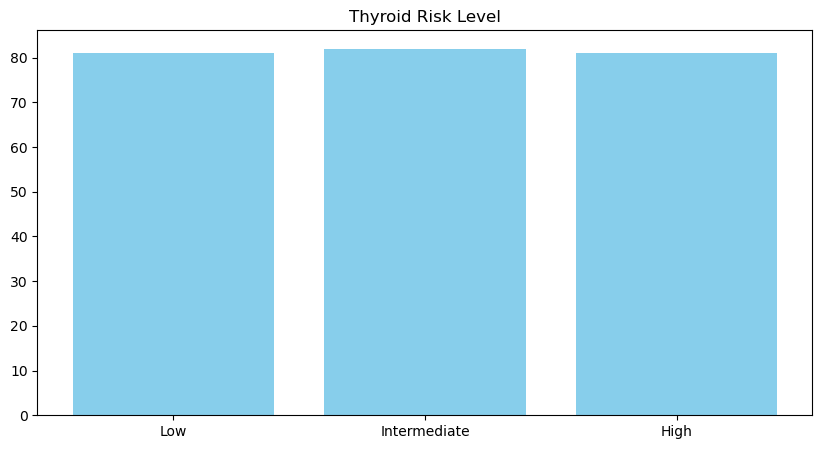

In [35]:
plt.figure(figsize=(10, 5))
plt.bar(df['Risk'], df['Age'], color='skyblue')
plt.title("Thyroid Risk Level")
plt.show()

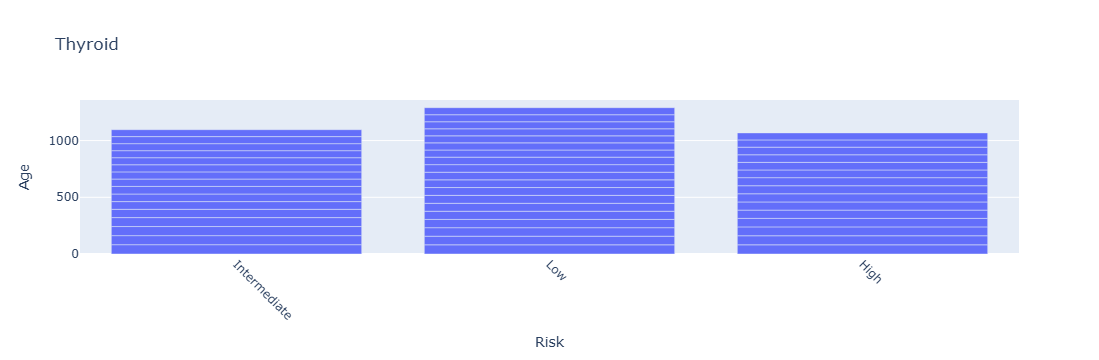

In [38]:
import plotly.express as px

thyroid = df.sort_values(by='Age', ascending=False).head(50)
fig = px.bar(thyroid, x='Risk', y='Age', title='Thyroid')
fig.update_layout(xaxis_tickangle=45)
fig.show()

In [39]:
most_aged= df.loc[df['Age'].idxmax()]
print(most_aged)

Age                                   82
Gender                                 M
Hx Radiothreapy                       No
Adenopathy                          Left
Pathology                      Papillary
Focality                       Uni-Focal
Risk                        Intermediate
T                                    T3b
N                                    N1b
M                                     M0
Stage                                 II
Response           Structural Incomplete
Recurred                             Yes
Name: 347, dtype: object


In [15]:
df['Response'].unique()   

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [21]:
x = df[df["Age"] >= 30].groupby("Response").size()
print(x)

Response
Biochemical Incomplete     21
Excellent                 142
Indeterminate              51
Structural Incomplete      72
dtype: int64


In [24]:
x = df[df["Age"] >= 40].groupby("Gender").size()
print(x)

Gender
F    131
M     44
dtype: int64


In [25]:
x = df[df["Age"] >= 40].groupby("Pathology").size()
print(x)

Pathology
Follicular         16
Hurthel cell       13
Micropapillary     30
Papillary         116
dtype: int64


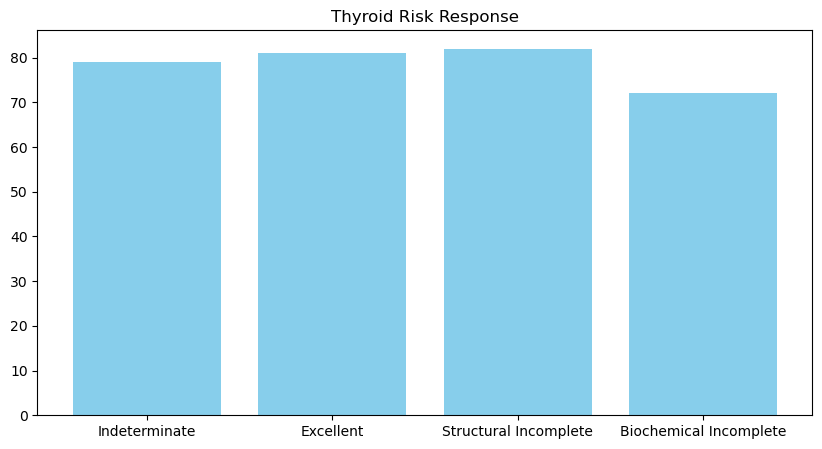

In [26]:
plt.figure(figsize=(10, 5))
plt.bar(df['Response'], df['Age'], color='skyblue')
plt.title("Thyroid Risk Response")
plt.show()

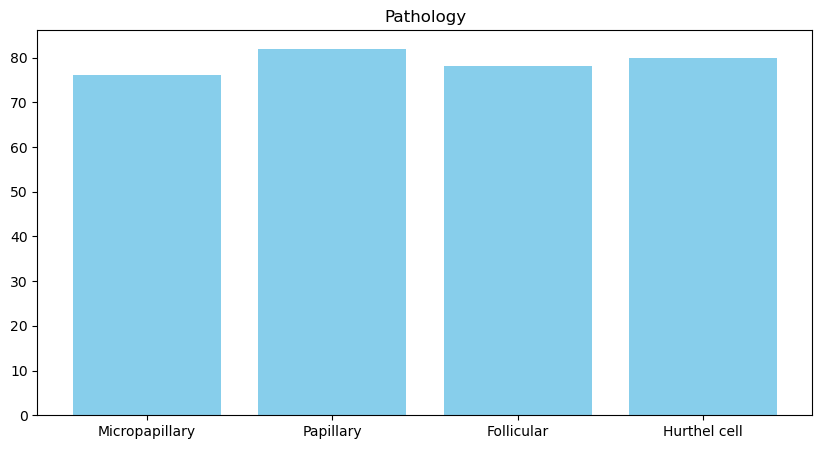

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(df['Pathology'], df['Age'], color='skyblue')
plt.title("Pathology")
plt.show()

In [29]:
x = df[df["Age"] >= 50].groupby("Focality").size()
print(x)

Focality
Multi-Focal    53
Uni-Focal      55
dtype: int64


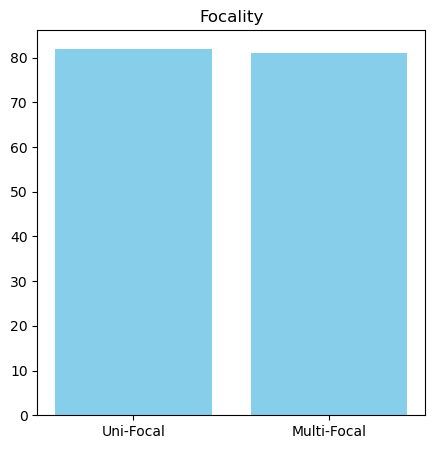

In [32]:
plt.figure(figsize=(5, 5))
plt.bar(df['Focality'], df['Age'], color='skyblue')
plt.title("Focality")
plt.show()